## Project Description

#### Build a model that classifies the side effects of a drug 

## Dataset Description

* Name (categorical)       : Name of the patient
* Age (numerical)          : Age group range of user
* Race (categorical)       : Race of the patients 
* Condition (categorical)  : Name of condition
* Date (date)              : date of review entry
* Drug (categorical)       : Name of drug
* EaseOfUse (numerical)    : 5 star rating
* Effectiveness (numerical): 5 star rating
* Sex (categorical)        : gender of user
* Side (text)              : side effects associated with drug (if any)





#### Loading the libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Drug_Side_effects.csv')

## Understanding the data 

In [3]:
data.head()

,Name,Age,Race,Condition,Date,Drug,EaseofUse,Effectiveness,Sex,Sides
0,Brandon Jordan,51-60,Asian,Pain,9/21/2014,choline mag trisalicylate,5,5,female,no side effects
1,Todd Gardner,31-40,White,Pain,1/13/2011,lortab,5,5,female,no side effects
2,Phillip Medina,31-40,White,High Cholesterol,7/16/2012,cholestyramine light 4 gram oral powde,2,3,female,moderate side effects
3,Lisa Price,71-80,White,Pain,9/23/2010,lortab,2,2,female,extreme severe side effects
4,Anthony Davis,71-80,Hispanic,Birth Control,1/6/2009,chateal,1,1,female,extreme severe side effects


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362803 entries, 0 to 362802
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Name           362803 non-null  object
 1   Age            362800 non-null  object
 2   Race           362800 non-null  object
 3   Condition      362800 non-null  object
 4   Date           362803 non-null  object
 5   Drug           362800 non-null  object
 6   EaseofUse      362803 non-null  int64 
 7   Effectiveness  362803 non-null  int64 
 8   Sex            362800 non-null  object
 9   Sides          362803 non-null  object
dtypes: int64(2), object(8)
memory usage: 27.7+ MB


In [5]:
data.duplicated().value_counts()

False    362803
dtype: int64

In [6]:
data.shape

(362803, 10)

In [7]:
data.nunique()

Name             180963
Age                  10
Race                  4
Condition            15
Date               4524
Drug                 28
EaseofUse             5
Effectiveness         5
Sex                   2
Sides                 5
dtype: int64

In [8]:
data.describe()

,EaseofUse,Effectiveness
count,362803.000000,362803.000000
mean,4.019801,3.532030
std,1.317671,1.455916
min,1.000000,1.000000
25%,3.000000,3.000000
50%,5.000000,4.000000
75%,5.000000,5.000000
max,5.000000,5.000000


In [9]:
data.describe(include='all')

,Name,Age,Race,Condition,Date,Drug,EaseofUse,Effectiveness,Sex,Sides
count,362803,362800,362800,362800,362803,362800,362803.000000,362803.000000,362800,362803
unique,180963,10,4,15,4524,28,NaN,NaN,2,5
top,Michael Smith,71-80,White,Pain,10/29/2007,lexapro,NaN,NaN,female,no side effects
freq,189,69187,115600,39771,404,29166,NaN,NaN,254006,111550
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.019801,3.532030,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1.317671,1.455916,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,NaN,NaN


In [10]:
data.columns

Index(['Name', 'Age', 'Race', 'Condition', 'Date', 'Drug', 'EaseofUse',
       'Effectiveness', 'Sex', 'Sides'],
      dtype='object')

In [11]:
data.Age.value_counts()

71-80     69187
31-40     65160
51-60     57986
91-100    32761
0-10      28936
21-30     25413
81-90     25353
61-70     21872
41-50     18099
11-20     18033
Name: Age, dtype: int64

In [12]:
data.Race.value_counts()

White       115600
Hispanic    101684
Black        80174
Asian        65342
Name: Race, dtype: int64

In [13]:
data.Condition.value_counts()

Pain                                                         39771
Migraine Headache                                            32538
Other                                                        29126
Major Depressive Disorder                                    29124
Migraine Prevention                                          29002
High Blood Pressure                                          28953
High Cholesterol                                             27135
Birth Control                                                26951
Type 2 Diabetes Mellitus                                     25552
Depression                                                   25502
Underactive Thyroid                                          25368
Overweight                                                   21926
Rheumatoid Arthritis                                          7353
Disorder characterized by Stiff, Tender & Painful Muscles     7330
Chronic Trouble Sleeping                                      

In [14]:
data.Drug.value_counts()

lexapro                                      29166
celexa                                       25460
warfarin (bulk) 100 % powder                 18322
lotrel                                       18140
cholestyramine light 4 gram oral powde       16300
contrave                                     14677
levothyroxine 500 mcg intravenous powder     14546
canagliflozin tablet                         14503
lortab                                       14458
choline mag trisalicylate                    14415
chateal                                      14394
lyza                                         12557
liraglutide pen injector                     11049
corgard                                      10953
cambia 50 mg oral powder packet              10898
nodolor                                      10887
lovastatin tablet, extended release 24 hr    10835
cafergot                                     10831
euthyrox                                     10822
naratriptan hcl                

In [15]:
data.EaseofUse.value_counts()

5    192650
4     74732
3     41303
1     35927
2     18191
Name: EaseofUse, dtype: int64

In [16]:
data.Effectiveness.value_counts()

5    130388
4     81821
3     60406
1     59387
2     30801
Name: Effectiveness, dtype: int64

In [17]:
data.Sex.value_counts()

female    254006
male      108794
Name: Sex, dtype: int64

In [18]:
data.Sides.value_counts()

no side effects                111550
extreme severe side effects    100901
mild side effects               63158
moderate side effects           51852
severe side effects             35342
Name: Sides, dtype: int64

### Checking missing values

In [19]:
data.isnull().sum()

Name             0
Age              3
Race             3
Condition        3
Date             0
Drug             3
EaseofUse        0
Effectiveness    0
Sex              3
Sides            0
dtype: int64

####  Dataset has missing values 

In [20]:
#Filling the dataset with modes 
data['Age'] = data['Age'].fillna(data['Age'].mode()[0])
data['Race'] = data['Race'].fillna(data['Race'].mode()[0])
data['Condition'] = data['Condition'].fillna(data['Condition'].mode()[0])
data['Drug'] = data['Drug'].fillna(data['Drug'].mode()[0])
data['Sex'] = data['Sex'].fillna(data['Sex'].mode()[0])
data['Sides'] = data['Sides'].fillna(data['Sides'].mode()[0])


In [21]:
data.isnull().sum()

Name             0
Age              0
Race             0
Condition        0
Date             0
Drug             0
EaseofUse        0
Effectiveness    0
Sex              0
Sides            0
dtype: int64

#### Missing values are filled using mode and now dataset contains no missing values.

## Checking for Outliers

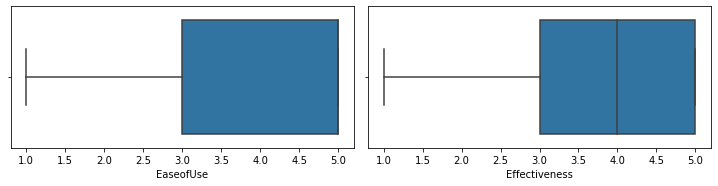

In [22]:
# Plot boxplot to find outliers
df_numerical = data.select_dtypes(exclude='object')
x=1
plt.figure(figsize = (20, 15))
for col in df_numerical.columns:
    plt.subplot(6,4,x)
    sns.boxplot(data[col])
    x+=1
plt.tight_layout()

#### No outliers present in the dataset 

## Data Encoding 

In [23]:
#Creating a copy of the dataset "data"
new_data=data.copy()

In [24]:
new_data.head()

,Name,Age,Race,Condition,Date,Drug,EaseofUse,Effectiveness,Sex,Sides
0,Brandon Jordan,51-60,Asian,Pain,9/21/2014,choline mag trisalicylate,5,5,female,no side effects
1,Todd Gardner,31-40,White,Pain,1/13/2011,lortab,5,5,female,no side effects
2,Phillip Medina,31-40,White,High Cholesterol,7/16/2012,cholestyramine light 4 gram oral powde,2,3,female,moderate side effects
3,Lisa Price,71-80,White,Pain,9/23/2010,lortab,2,2,female,extreme severe side effects
4,Anthony Davis,71-80,Hispanic,Birth Control,1/6/2009,chateal,1,1,female,extreme severe side effects


In [25]:
from sklearn.preprocessing import LabelEncoder

le_race=LabelEncoder()
le_Condition=LabelEncoder()
le_Drug=LabelEncoder()
le_Sex=LabelEncoder()

In [26]:
new_data['Race']=le_race.fit_transform(data['Race'])
new_data['Condition']=le_Condition.fit_transform(data['Condition'])
new_data['Drug']=le_Drug.fit_transform(data['Drug'])
new_data['Sex']=le_Sex.fit_transform(data['Sex'])

In [27]:
new_data['Age'].astype(str)

0         51-60
1         31-40
2         31-40
3         71-80
4         71-80
          ...  
362798    61-70
362799    31-40
362800    71-80
362801    71-80
362802    71-80
Name: Age, Length: 362803, dtype: object

In [28]:
# Replacing age_range
def age_fun(new_data):
    if new_data['Age'] == '0-10':
        return 1
    elif new_data['Age'] == '11-20':
        return 2
    elif new_data['Age'] == '21-30':
        return 3
    elif new_data['Age'] == '31-40':
        return 4
    elif new_data['Age'] == '41-50':
        return 5
    elif new_data['Age'] == '51-60':
        return 6
    elif new_data['Age'] == '61-70':
        return 7
    elif new_data['Age'] == '71-80':
        return 8
    elif new_data['Age'] == '81-90':
        return 9
    elif new_data['Age'] == '91-100':
        return 10

In [29]:
new_data['Age'] = new_data.apply(age_fun, axis = 1)

In [30]:
new_data.shape

(362803, 10)

In [31]:
new_data.head()

,Name,Age,Race,Condition,Date,Drug,EaseofUse,Effectiveness,Sex,Sides
0,Brandon Jordan,6,0,11,9/21/2014,9,5,5,0,no side effects
1,Todd Gardner,4,3,11,1/13/2011,19,5,5,0,no side effects
2,Phillip Medina,4,3,5,7/16/2012,8,2,3,0,moderate side effects
3,Lisa Price,8,3,11,9/23/2010,19,2,2,0,extreme severe side effects
4,Anthony Davis,8,2,0,1/6/2009,6,1,1,0,extreme severe side effects


## Data Reduction

In [32]:
new_data.drop(['Name','Date'],axis=1,inplace=True)

<AxesSubplot:>

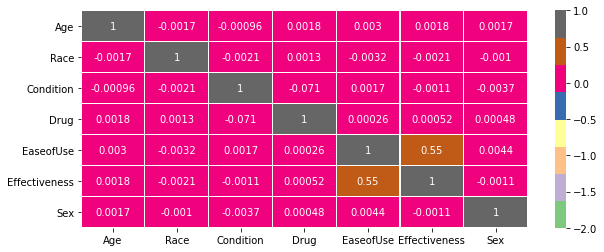

In [33]:
corrmatrix=new_data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=-2,vmax=1,annot=True,linewidths=0.2,cmap='Accent')

In [34]:
new_data.drop(['EaseofUse'],axis=1,inplace=True)

In [35]:
new_data.head()

,Age,Race,Condition,Drug,Effectiveness,Sex,Sides
0,6,0,11,9,5,0,no side effects
1,4,3,11,19,5,0,no side effects
2,4,3,5,8,3,0,moderate side effects
3,8,3,11,19,2,0,extreme severe side effects
4,8,2,0,6,1,0,extreme severe side effects


### Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scale=['Effectiveness']
new_data[scale] = ss.fit_transform(new_data[scale])


## Exploratory Data Analysis

#### Age vs Side effect

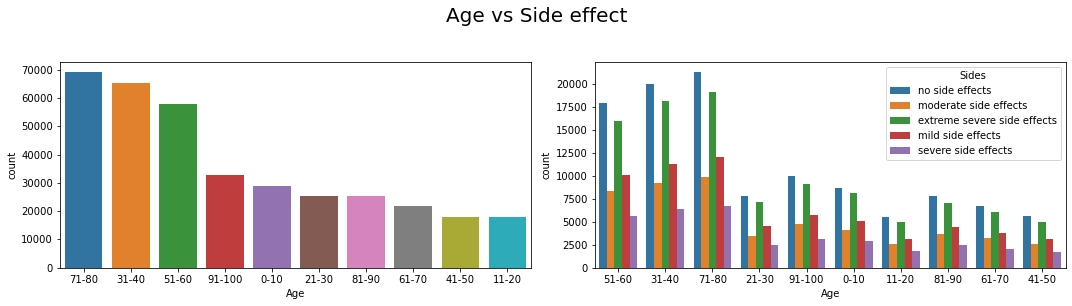

Age     Sides                      
0-10    no side effects                0.300940
        extreme severe side effects    0.281518
        mild side effects              0.174903
        moderate side effects          0.142521
        severe side effects            0.100118
11-20   no side effects                0.308545
        extreme severe side effects    0.277602
        mild side effects              0.171574
        moderate side effects          0.142239
        severe side effects            0.100039
21-30   no side effects                0.306890
        extreme severe side effects    0.281391
        mild side effects              0.176996
        moderate side effects          0.136702
        severe side effects            0.098021
31-40   no side effects                0.307597
        extreme severe side effects    0.279082
        mild side effects              0.173665
        moderate side effects          0.142081
        severe side effects            0.097575
41-5

In [37]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data['Age'],order=data['Age'].value_counts().index)
plt.subplot(1, 2, 2)
sns.countplot(data=data, x = 'Age', hue='Sides')
plt.suptitle("Age vs Side effect",y=1.05,fontsize=20)
plt.tight_layout()
plt.show()


data.Age.value_counts(normalize=True)
data.groupby('Age')['Sides'].value_counts(normalize=True)

#### * Around 19% of the people are from 71-80 age group.Teenagers participation was least as compared to the adults  


#### Race vs Side effect

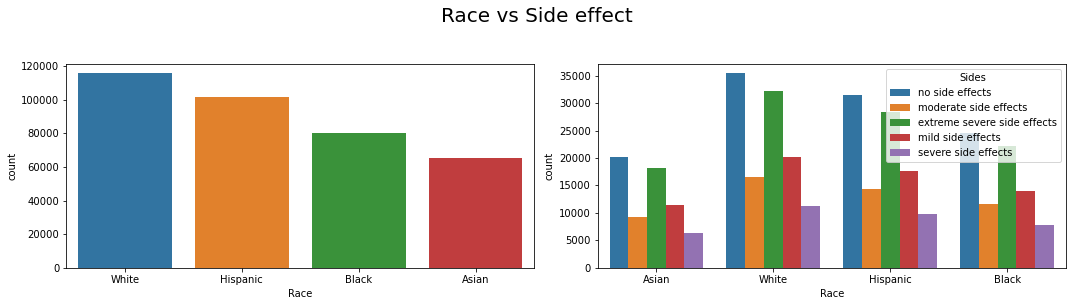

Race      Sides                      
Asian     no side effects                0.308561
          extreme severe side effects    0.277907
          mild side effects              0.175370
          moderate side effects          0.142175
          severe side effects            0.095987
Black     no side effects                0.305760
          extreme severe side effects    0.276598
          mild side effects              0.174433
          moderate side effects          0.144935
          severe side effects            0.098274
Hispanic  no side effects                0.309469
          extreme severe side effects    0.278598
          mild side effects              0.173193
          moderate side effects          0.141773
          severe side effects            0.096967
White     no side effects                0.306272
          extreme severe side effects    0.278860
          mild side effects              0.173897
          moderate side effects          0.142955
          se

In [38]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data['Race'],order=data['Race'].value_counts().index)
plt.subplot(1, 2, 2)
sns.countplot(data=data, x = 'Race', hue='Sides')
plt.suptitle("Race vs Side effect",y=1.05,fontsize=20)
plt.tight_layout()
plt.show()


data.Race.value_counts(normalize=True)
data.groupby('Race')['Sides'].value_counts(normalize=True)

#### * 31% of people are whites followed by Hispanic(28%),Black(22%) and Asian(18%)

#### Condition

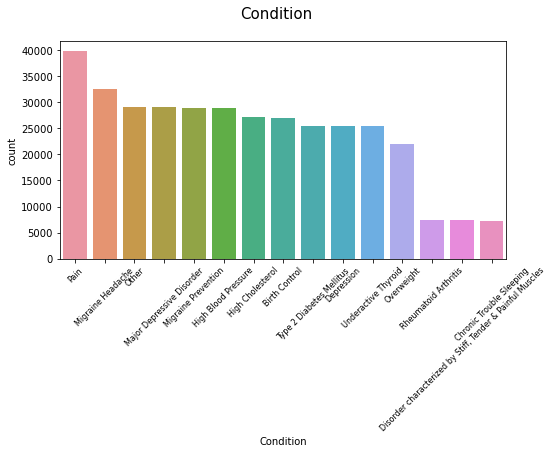

Pain                                                         0.109630
Migraine Headache                                            0.089685
Other                                                        0.080280
Major Depressive Disorder                                    0.080275
Migraine Prevention                                          0.079939
High Blood Pressure                                          0.079804
High Cholesterol                                             0.074793
Birth Control                                                0.074285
Type 2 Diabetes Mellitus                                     0.070429
Depression                                                   0.070292
Underactive Thyroid                                          0.069922
Overweight                                                   0.060435
Rheumatoid Arthritis                                         0.020267
Disorder characterized by Stiff, Tender & Painful Muscles    0.020204
Chronic Trouble Slee

In [39]:
plt.figure(figsize=(8,4))
sns.countplot(data=data,x='Condition',order=data['Condition'].value_counts().index)
plt.suptitle("Condition",y=1,fontsize=15)

plt.xticks(rotation=45,fontsize=8);
plt.show()

data.Condition.value_counts(normalize=True)

#### * Majority of the people was affected by Pain followed by Migraine Headache. Few people are affected by Chronic Trouble sleeping.

#### Drug vs Side effect

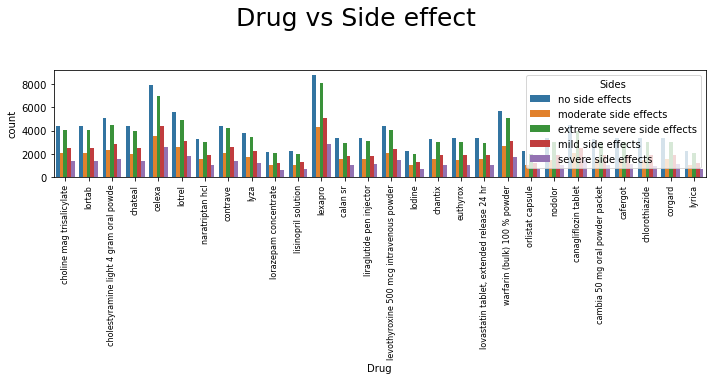

In [40]:
plt.figure(figsize = (10, 5))
sns.countplot(data=data, x = 'Drug', hue='Sides')
plt.suptitle("Drug vs Side effect",y=1.05,fontsize=25)
plt.xticks(rotation=90,fontsize=8);
plt.tight_layout()
plt.show()  


#### Drug

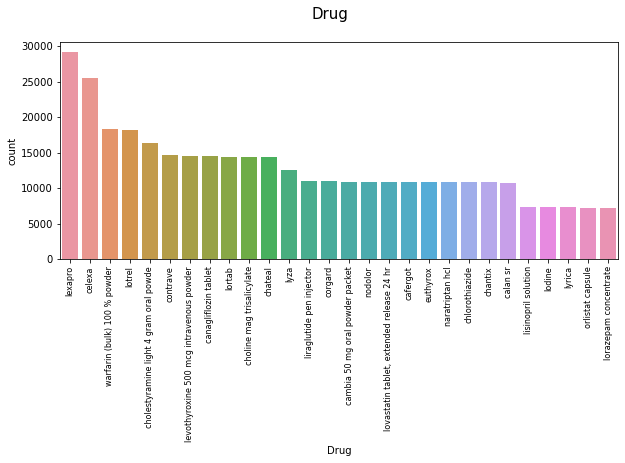

lexapro                                      0.080399
celexa                                       0.070176
warfarin (bulk) 100 % powder                 0.050501
lotrel                                       0.050000
cholestyramine light 4 gram oral powde       0.044928
contrave                                     0.040454
levothyroxine 500 mcg intravenous powder     0.040093
canagliflozin tablet                         0.039975
lortab                                       0.039851
choline mag trisalicylate                    0.039732
chateal                                      0.039674
lyza                                         0.034611
liraglutide pen injector                     0.030455
corgard                                      0.030190
cambia 50 mg oral powder packet              0.030038
nodolor                                      0.030008
lovastatin tablet, extended release 24 hr    0.029865
cafergot                                     0.029854
euthyrox                    

In [41]:
plt.figure(figsize=(10,4))
sns.countplot(data=data,x='Drug',order=data['Drug'].value_counts().index)
plt.suptitle("Drug",y=1,fontsize=15)
#plt.xlabel('Drug', fontsize=15)
plt.xticks(rotation=90,fontsize=8);
plt.show()

data.Drug.value_counts(normalize=True)

#### * Lexapro is the most widely used drug which is used for Depression and Pain

In [42]:
data[data['Drug'] == 'lexapro']['Condition'].unique()

array(['Major Depressive Disorder', 'Depression', 'Pain'], dtype=object)

In [43]:
data.groupby('Drug')['Condition'].nunique().sort_values(ascending=False)

Drug
lexapro                                      3
celexa                                       2
liraglutide pen injector                     1
orlistat capsule                             1
nodolor                                      1
naratriptan hcl                              1
lyza                                         1
lyrica                                       1
lovastatin tablet, extended release 24 hr    1
lotrel                                       1
lortab                                       1
lorazepam concentrate                        1
lodine                                       1
lisinopril solution                          1
cafergot                                     1
calan sr                                     1
levothyroxine 500 mcg intravenous powder     1
euthyrox                                     1
corgard                                      1
contrave                                     1
choline mag trisalicylate                    1
cholesty

#### Effectiveness vs Side effect

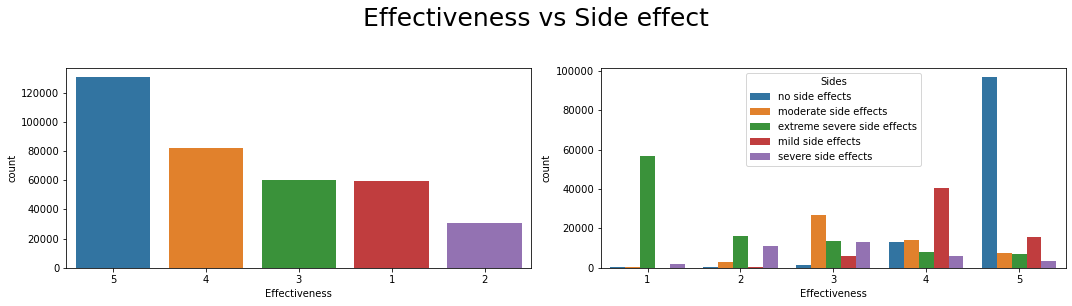

5    0.359391
4    0.225525
3    0.166498
1    0.163689
2    0.084897
Name: Effectiveness, dtype: float64

In [44]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data['Effectiveness'],order=data['Effectiveness'].value_counts().index)
plt.subplot(1, 2, 2)
sns.countplot(data=data, x = 'Effectiveness', hue='Sides')
plt.suptitle("Effectiveness vs Side effect",y=1.05,fontsize=25)
plt.tight_layout()
plt.show()


data.Effectiveness.value_counts(normalize=True)

#### * Majority rated the effectiveness as the drug used was extremely effective.When comparing with the side effect, more rated as that drug consumed has no side effects and rated effectiveness as Extremely Effective

#### Effectiveness vs Age

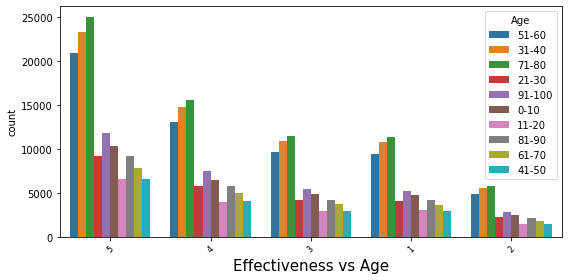

In [45]:
plt.figure(figsize=(8,4))
sns.countplot(data=data,x='Effectiveness',order=data['Effectiveness'].value_counts().index,hue='Age')
plt.xlabel('Effectiveness vs Age', fontsize=15)
plt.xticks(rotation=45,fontsize=8);
plt.tight_layout()
plt.show()

#### The drug was extremely effective in 71-80 age group and not effective for the age group 41-50

#### Ease of use vs Side effect

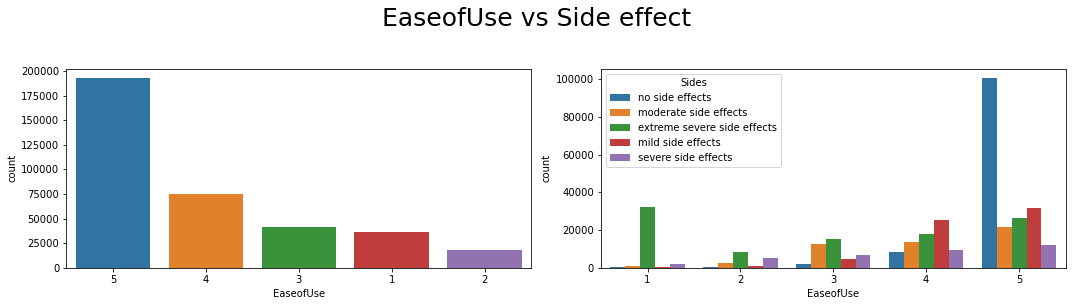

5    0.531004
4    0.205985
3    0.113844
1    0.099026
2    0.050140
Name: EaseofUse, dtype: float64

In [46]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data['EaseofUse'],order=data['EaseofUse'].value_counts().index)
plt.subplot(1, 2, 2)
sns.countplot(data=data, x = 'EaseofUse', hue='Sides')
plt.suptitle("EaseofUse vs Side effect",y=1.05,fontsize=25)
plt.tight_layout()
plt.show()


data.EaseofUse.value_counts(normalize=True)

#### * Majority rated as 5 which means strongly agrees.When comparing with the side effect, majority strongly agrees that the drugs they consumed has no side effects

#### Ease of use vs Age

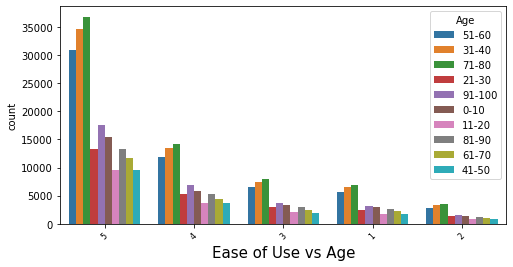

In [47]:
plt.figure(figsize=(8,4))
sns.countplot(data=data,x='EaseofUse',order=data['EaseofUse'].value_counts().index,hue='Age')
plt.xlabel('Ease of Use vs Age', fontsize=15)
plt.xticks(rotation=45,fontsize=8);
plt.show()

#### * Easiness of use is high for the age groups 71-80 and 91-80 with respect to other age group. Easiness of use was low for the age group 41-50

#### Ease of use vs Gender

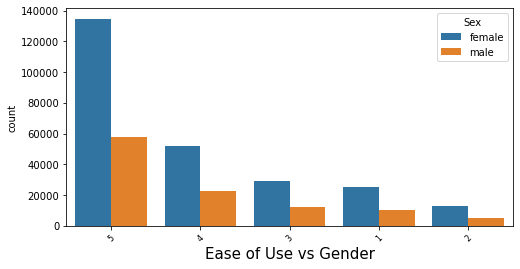

In [48]:
plt.figure(figsize=(8,4))
sns.countplot(data=data,x='EaseofUse',order=data['EaseofUse'].value_counts().index,hue='Sex')
plt.xlabel('Ease of Use vs Gender', fontsize=15)
plt.xticks(rotation=45,fontsize=8);
plt.show()

#### Easiness rating was high for females compared to males.

#### Sex vs Side effect

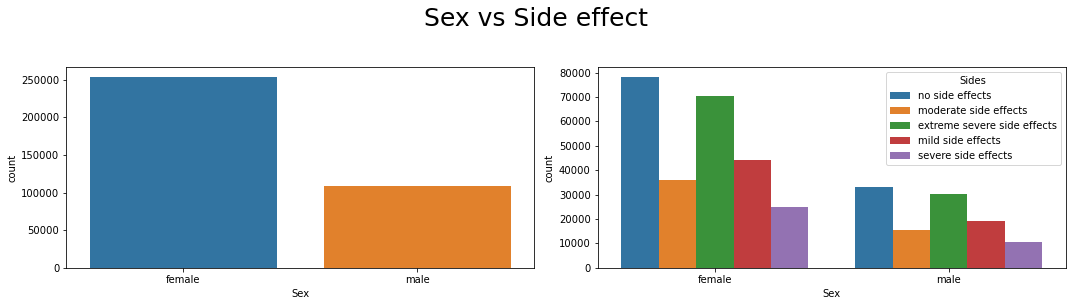

female    0.700129
male      0.299871
Name: Sex, dtype: float64

In [49]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data['Sex'],order=data['Sex'].value_counts().index)
plt.subplot(1, 2, 2)
sns.countplot(data=data, x = 'Sex', hue='Sides')
plt.suptitle("Sex vs Side effect",y=1.05,fontsize=25)
plt.tight_layout()
plt.show()


data.Sex.value_counts(normalize=True)

#### Females are more affected by the side effects than men.

#### Drug vs Age 

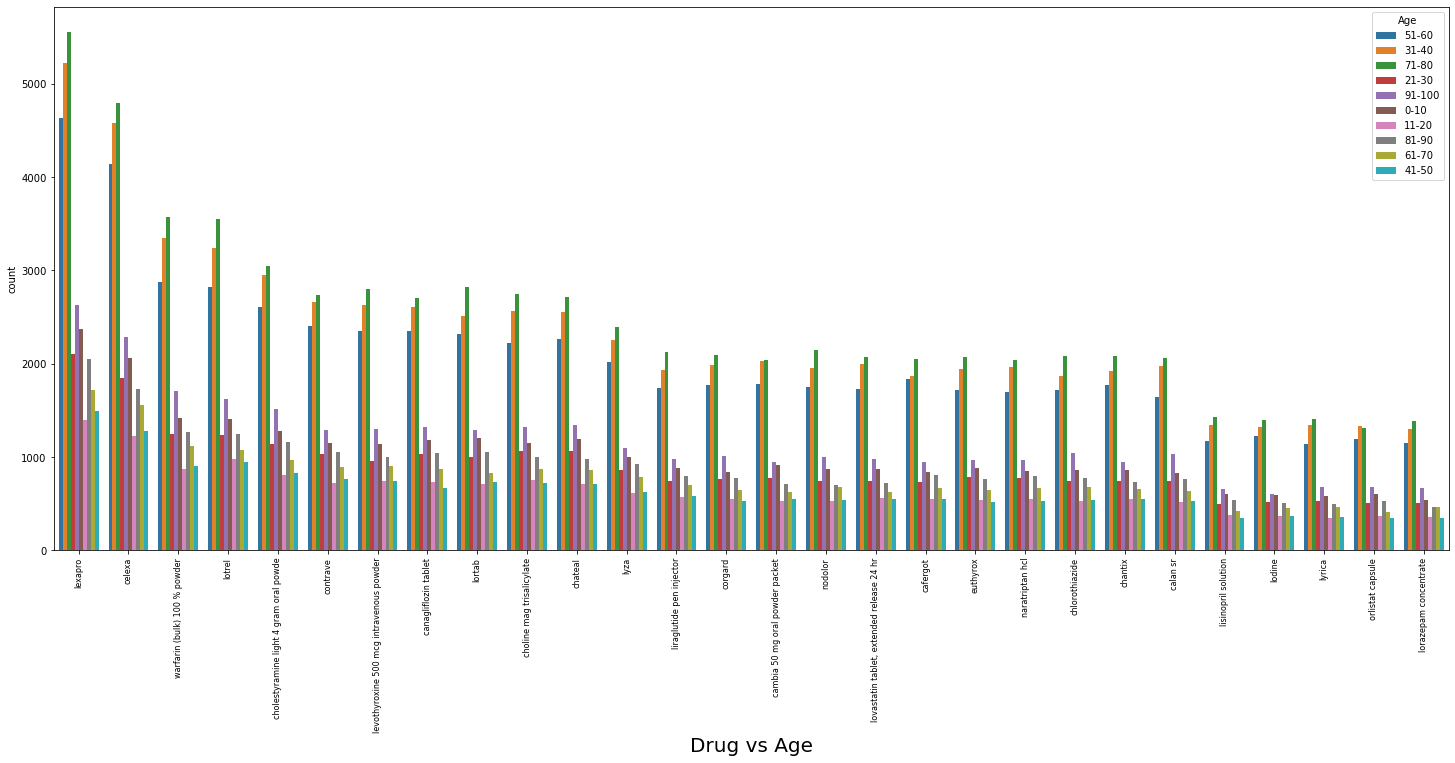

In [50]:
plt.figure(figsize=(25,10))
sns.countplot(data=data,x='Drug',order=data['Drug'].value_counts().index,hue='Age')
plt.xlabel('Drug vs Age', fontsize=20)
plt.xticks(rotation=90,fontsize=8);
plt.show()

#### Consumption rate of drug is high for the people of age group 71-80 ,81-90 and 91-100 and it is followed by adults.Consumption rate for teenagers is low .Higher Consumption rate of drug for the people above 71 shows their fear/old age illeness.

#### Gender Participation

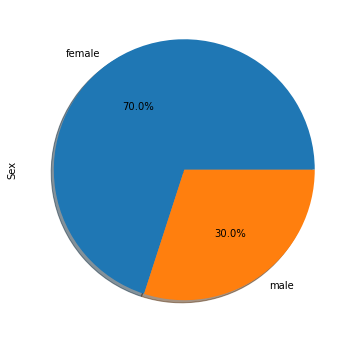

In [51]:
plt.figure(figsize=(6,6))
data['Sex'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

#### Majority of the people are females

#### Compairing Ease of use and Effectiveness with Year

In [52]:
df=data.copy()
data['Date']=pd.to_datetime(data['Date'])
data['year']=data['Date'].dt.year # create year
data['month'] = data['Date'].dt.month #create month

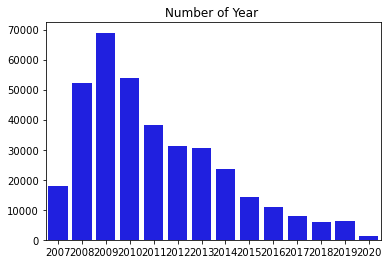

In [53]:
yea = data['year'].value_counts().sort_index()
sns.barplot(yea.index,yea.values,color='blue')
plt.title('Number of Year ')
plt.show()

#### * Most of the rating was in the year 2009 followed by 2010 and 2008

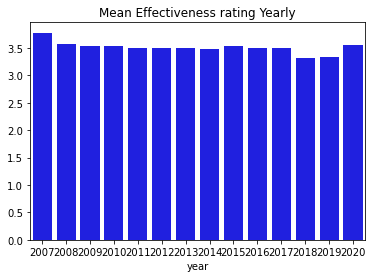

In [54]:
rating_year = data.groupby('year')['Effectiveness'].mean()
sns.barplot(rating_year.index,rating_year.values,color='blue')
plt.title('Mean Effectiveness rating Yearly')
plt.show()

#### * Mean effective rating was high for the year 2007. 

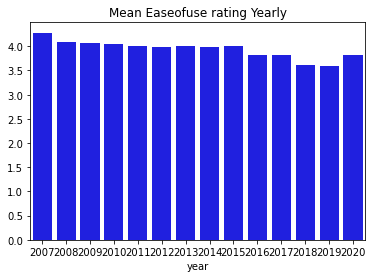

In [55]:
rating_year = data.groupby('year')['EaseofUse'].mean()
sns.barplot(rating_year.index,rating_year.values,color='blue')
plt.title('Mean Easeofuse rating Yearly')
plt.show()

#### * Mean yearly ease of use rating was above 4 for the year 2007 compaared to other years.

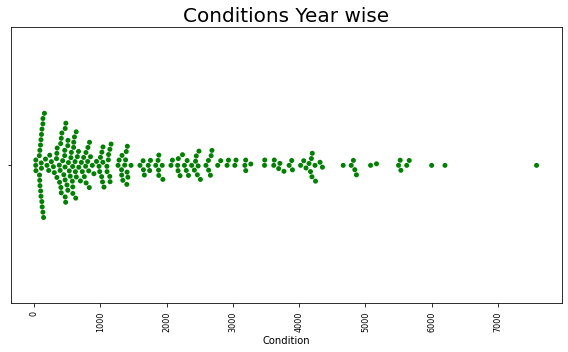

In [56]:
#checking year wise conditions counts
plt.figure(figsize=(8,5))

sns.swarmplot(data.groupby('year')['Condition'].value_counts(),color='green')
plt.title('Conditions Year wise',fontsize=20)
plt.xticks(rotation=90,fontsize=8);
plt.tight_layout()
plt.show()


In [57]:
data.groupby('year')['Condition'].value_counts()

year  Condition                                                
2007  Pain                                                         1945
      Migraine Headache                                            1647
      High Blood Pressure                                          1465
      Major Depressive Disorder                                    1409
      Migraine Prevention                                          1401
                                                                   ... 
2020  Underactive Thyroid                                            85
      Type 2 Diabetes Mellitus                                       82
      Chronic Trouble Sleeping                                       31
      Disorder characterized by Stiff, Tender & Painful Muscles      29
      Rheumatoid Arthritis                                           28
Name: Condition, Length: 210, dtype: int64

#### * Conditions was higher during the year 2007 and it began to decrease from 2008 onwards to 2020.

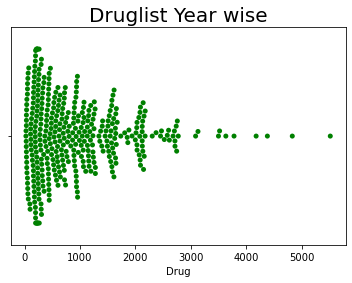

In [58]:
#checking year wise drug counts 


sns.swarmplot(data.groupby('year')['Drug'].value_counts(),color='green')
plt.title('Druglist Year wise',fontsize=20)
plt.show()

In [59]:
data.groupby('year')['Drug'].value_counts()

year  Drug                                  
2007  lexapro                                   1453
      celexa                                    1225
      warfarin (bulk) 100 % powder               890
      lotrel                                     887
      cholestyramine light 4 gram oral powde     806
                                                ... 
2020  lorazepam concentrate                       31
      lyrica                                      29
      lodine                                      28
      orlistat capsule                            25
      lisinopril solution                         23
Name: Drug, Length: 392, dtype: int64

#### * Drug usage was high during 2007 as one drug is used for treating different condition.Later onwards,we can see a decline in the drug usage.

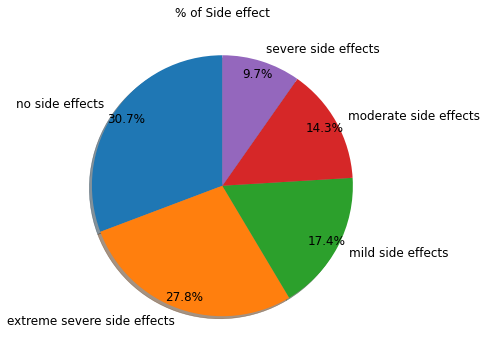

In [60]:
plt.figure(figsize=(10,6))
plt.title('% of Side effect')
tr = pd.DataFrame(data['Sides'].value_counts())
tr_names = tr.index
count = tr['Sides']
plt.style.use('ggplot')
plt.rc('font', size=12)
plt.pie(count, autopct='%1.1f%%', labels = tr_names, pctdistance=0.9, labeldistance=1.1,shadow=True, startangle=90)

plt.show()

####  Around 70% of the people reported as they have side effects ranging from mild to extreme.30% reported as they have no side effects from the drugs they consumed.


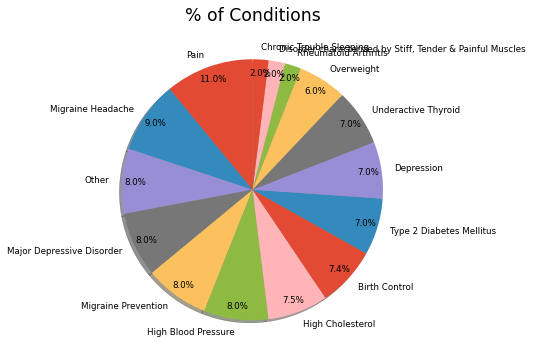

In [61]:
plt.figure(figsize=(10,6))
plt.title('% of Conditions')
tr = pd.DataFrame(data['Condition'].value_counts())
tr_names = tr.index
count = tr['Condition']
plt.style.use('ggplot')
plt.rc('font', size=8.7)
plt.pie(count, autopct='%1.1f%%', labels = tr_names, pctdistance=0.9, labeldistance=1.1,shadow=True, startangle=90)

plt.show()

#### * Majority of the people suffered due to Pain,Migraine Headache and other conditions.

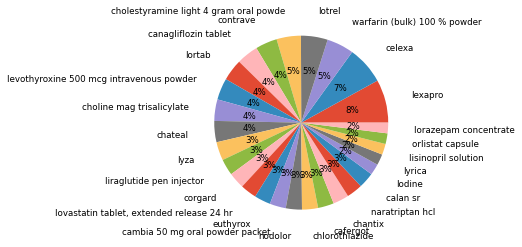

In [62]:
fe=data.loc[(data['Sex']=='female')]
dr=pd.DataFrame(fe['Drug'].value_counts(normalize=True))
dr_id=dr.index
list1=dr['Drug']
plt.pie(list1,labels=dr_id,labeldistance=1.3,autopct='%1.0f%%')
plt.show()

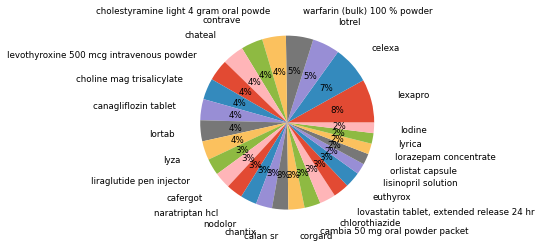

In [63]:
me=data.loc[(data['Sex']=='male')]
dr=pd.DataFrame(me['Drug'].value_counts(normalize=True))
dr_id=dr.index
list1=dr['Drug']
plt.pie(list1,labels=dr_id,labeldistance=1.3,autopct='%1.0f%%')
plt.show()

#### Age vs Sex

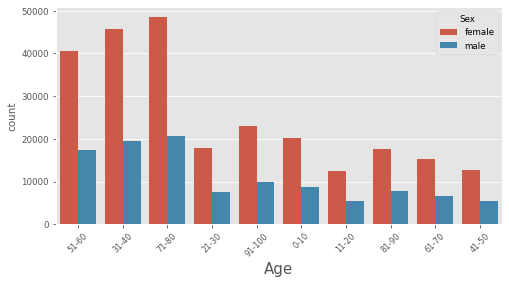

In [64]:
plt.figure(figsize=(8,4))
sns.countplot(data=data,x='Age',hue='Sex')
plt.xlabel('Age', fontsize=15)
plt.xticks(rotation=45,fontsize=8);
plt.show()

#### * Majority of the females and males participation is from 71-80,51-60 and 31-40 age groups.

## Splitting dataset to train and test

In [65]:
y=new_data['Sides']
x=new_data.drop('Sides',axis=1)

In [66]:
x.head()

,Age,Race,Condition,Drug,Effectiveness,Sex
0,6,0,11,9,1.008281,0
1,4,3,11,19,1.008281,0
2,4,3,5,8,-0.365427,0
3,8,3,11,19,-1.052280,0
4,8,2,0,6,-1.739134,0


In [67]:
y.head()

0                no side effects
1                no side effects
2          moderate side effects
3    extreme severe side effects
4    extreme severe side effects
Name: Sides, dtype: object

## Modelling

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

#### Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression


In [71]:
logrs_model=LogisticRegression(max_iter=100)# setting multiclass to multinomial since we have three categories 
logrs_model.fit(x_train,y_train)
y_pred=logrs_model.predict(x_test)

print("Accuracy",accuracy_score(y_test,y_pred))
print("F1 score:",f1_score(y_test,y_pred,average='macro'))


Accuracy 0.61865189289012
F1 score: 0.41109771302166787


In [72]:
conf=confusion_matrix(y_test,y_pred)
conf_mat= pd.DataFrame(conf, index = ['no sideffect','mild','moderate','severe','extreme severe'], columns = ['no side effects','mild side effects','moderate side effects','severe side effects','extreme severe side effects'])
conf_mat

,no side effects,mild side effects,moderate side effects,severe side effects,extreme severe side effects
no sideffect,17257,1522,0,1395,0
mild,1303,8169,0,3115,0
moderate,6104,2746,0,1525,0
severe,343,2533,0,19464,0
extreme severe,5179,1167,0,739,0


#### KNN Algorithm

In [73]:
from sklearn.neighbors import KNeighborsClassifier 

In [74]:
acc_values=[]

neighbor=np.arange(3,18)
for k in neighbor:
    k_model=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    k_model.fit(x_train,y_train)
    y_pred=k_model.predict(x_test)
  
    acc=accuracy_score(y_test,y_pred)
   
    acc_values.append(acc)
 

In [75]:
print(acc_values)

[0.5570623337605601, 0.5784374526260664, 0.5908959358332989, 0.6010804702250521, 0.6100797949311614, 0.6169705489174625, 0.622152395915161, 0.6248535714777911, 0.6272791168809692, 0.630297267126969, 0.6313308802249142, 0.6327228125301471, 0.6343214674549689, 0.6347624757100921, 0.634734912694147]


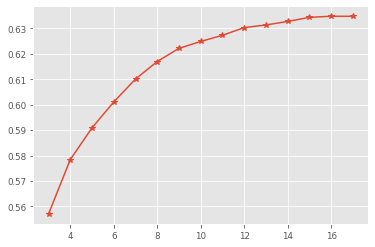

In [76]:
plt.plot(neighbor,acc_values,'*-')
plt.show()

In [77]:
classifier=KNeighborsClassifier(n_neighbors=16,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

acc=accuracy_score(y_pred,y_test)
print(acc)

0.6347624757100921


In [78]:
print("F1 score",f1_score(y_test,y_pred,average='macro'))
print("precision",precision_score(y_test,y_pred,average='macro'))
print("recall score",recall_score(y_test,y_pred,average='macro'))


F1 score 0.5124509884113625
precision 0.5348497674058836
recall score 0.5264854870276583


In [79]:
conf=confusion_matrix(y_test,y_pred)
conf_mat= pd.DataFrame(conf, index = ['no sideffect','mild','moderate','severe','extreme severe'], columns = ['no side effects','mild side effects','moderate side effects','severe side effects','extreme severe side effects'])
conf_mat

,no side effects,mild side effects,moderate side effects,severe side effects,extreme severe side effects
no sideffect,14724,1574,1923,1461,492
mild,364,7558,1088,3501,76
moderate,1583,2874,3839,1649,430
severe,171,2359,256,19527,27
extreme severe,2801,1234,1845,794,411


#### RANDOM FOREST CLASSIFIER 

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rfc_model=RandomForestClassifier()
rfc_model.fit(x_train,y_train)
y_pred=rfc_model.predict(x_test)
print("F1_score",f1_score(y_pred,y_test,average='macro'))
print("Accuracy",accuracy_score(y_pred,y_test))


F1_score 0.5409705325829106
Accuracy 0.6450021361337358


In [82]:
conf=confusion_matrix(y_test,y_pred)
conf_mat= pd.DataFrame(conf, index = ['no sideffect','mild','moderate','severe','extreme severe'], columns = ['no side effects','mild side effects','moderate side effects','severe side effects','extreme severe side effects'])
conf_mat

,no side effects,mild side effects,moderate side effects,severe side effects,extreme severe side effects
no sideffect,14015,1491,2322,1415,931
mild,183,7884,1153,3241,126
moderate,995,2667,4651,1557,505
severe,101,2433,272,19498,36
extreme severe,2232,1131,2209,759,754


Checking feature importance 

In [83]:
pd.Series(rfc_model.feature_importances_,index=x.columns).sort_values(ascending=False)*100

Effectiveness    88.266843
Age               5.067923
Race              2.214887
Drug              2.161636
Condition         1.619574
Sex               0.669137
dtype: float64

Fine tuning

In [84]:
y1=pd.DataFrame(new_data['Sides'])
x1=new_data.drop(['Sides','Sex'],axis=1)

x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=1,test_size=.2)

In [85]:
rft_tuning=RandomForestClassifier(bootstrap=True,n_estimators=1500,max_depth=10,criterion='entropy',random_state=42)
rft_tuning.fit(x1_train,y1_train)
y1_pred=rft_tuning.predict(x1_test)
print("F1_score",f1_score(y1_test,y1_pred,average='macro'))
print("Accuracy",accuracy_score(y1_test,y1_pred)) 
conf=confusion_matrix(y1_test,y1_pred)
conf_mat= pd.DataFrame(conf, index = ['no sideffect','mild','moderate','severe','extreme severe'], columns = ['no side effects','mild side effects','moderate side effects','severe side effects','extreme severe side effects'])
conf_mat

F1_score 0.5184918047876155
Accuracy 0.6524303689309684


,no side effects,mild side effects,moderate side effects,severe side effects,extreme severe side effects
no sideffect,14498,1611,2705,1344,10
mild,118,8169,1239,3221,0
moderate,721,2886,5211,1443,3
severe,88,2529,232,19460,0
extreme severe,2517,1194,2656,703,3


#### Naive Bayes Classifier

In [86]:
from sklearn.naive_bayes import GaussianNB

In [87]:
classifier=GaussianNB()
classifier.fit(x_train,y_train)
pred=classifier.predict(x_test)

In [88]:
print("Accuracy_score",accuracy_score(y_test,pred))
print("precision",precision_score(y_test,pred,average='macro'))
print("F1_score",f1_score(y_test,y_pred,average='macro'))


Accuracy_score 0.61865189289012
precision 0.3639483240004598
F1_score 0.5409705325829106


In [89]:
conf=confusion_matrix(y_test,y_pred)
conf_mat= pd.DataFrame(conf, index = ['no sideffect','mild','moderate','severe','extreme severe'], columns = ['no side effects','mild side effects','moderate side effects','severe side effects','extreme severe side effects'])
conf_mat

,no side effects,mild side effects,moderate side effects,severe side effects,extreme severe side effects
no sideffect,14015,1491,2322,1415,931
mild,183,7884,1153,3241,126
moderate,995,2667,4651,1557,505
severe,101,2433,272,19498,36
extreme severe,2232,1131,2209,759,754


#### Gradient Boosting Classifier 

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(x_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.590
Accuracy score (validation): 0.593
Learning rate:  0.075
Accuracy score (training): 0.642
Accuracy score (validation): 0.647
Learning rate:  0.1
Accuracy score (training): 0.652
Accuracy score (validation): 0.656
Learning rate:  0.25
Accuracy score (training): 0.652
Accuracy score (validation): 0.656
Learning rate:  0.5
Accuracy score (training): 0.652
Accuracy score (validation): 0.656
Learning rate:  0.75
Accuracy score (training): 0.652
Accuracy score (validation): 0.656
Learning rate:  1
Accuracy score (training): 0.651
Accuracy score (validation): 0.655


#### Gradient Boosting classifier with the highest accuracy rate is chosen

In [92]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(x_train, y_train)
y_pred = gb_clf2.predict(x_test)

print("Accuracy_score",accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred,average='macro'))
print("F1_score",f1_score(y_test,y_pred,average='macro'))


Accuracy_score 0.6557103678284478
precision 0.4993771885613321
F1_score 0.5219059574216122


In [93]:
conf=confusion_matrix(y_test,y_pred)
conf_mat= pd.DataFrame(conf, index = ['no sideffect','mild','moderate','severe','extreme severe'], columns = ['no side effects','mild side effects','moderate side effects','severe side effects','extreme severe side effects'])
conf_mat

,no side effects,mild side effects,moderate side effects,severe side effects,extreme severe side effects
no sideffect,14590,1522,2667,1395,0
mild,107,8169,1196,3115,0
moderate,748,2746,5356,1525,0
severe,89,2533,254,19464,0
extreme severe,2619,1167,2560,739,0
